In [1]:
import netCDF4 as nc
import numpy as np
import os

# Replace with your netCDF file path
yearly_file_path = "D:/GPM/IMD 2022/RF25_ind2022_rfp25.nc"
output_folder = "D:/GPM/IMD 2022/Daily"  # Folder where daily files will be saved

# Open the yearly netCDF file
dataset = nc.Dataset(yearly_file_path, 'r')

# Read longitude, latitude, and time data
longitudes = dataset.variables['LONGITUDE'][:]
latitudes = dataset.variables['LATITUDE'][:]
times = dataset.variables['TIME'][:]

# Process each day
for t in range(len(times)):
    # Create a new netCDF file for each day
    daily_file_path = os.path.join(output_folder, f'daily_precipitation_{t+1:03d}.nc')
    daily_dataset = nc.Dataset(daily_file_path, 'w', format='NETCDF4_CLASSIC')

    # Create dimensions
    daily_dataset.createDimension('LONGITUDE', len(longitudes))
    daily_dataset.createDimension('LATITUDE', len(latitudes))

    # Create variables
    daily_lon = daily_dataset.createVariable('LONGITUDE', np.float32, ('LONGITUDE',))
    daily_lat = daily_dataset.createVariable('LATITUDE', np.float32, ('LATITUDE',))
    daily_rain = daily_dataset.createVariable('RAINFALL', np.float32, ('LATITUDE', 'LONGITUDE'))

    # Copy data for longitude and latitude
    daily_lon[:] = longitudes
    daily_lat[:] = latitudes

    # Copy rainfall data for the current day
    daily_rain[:, :] = dataset.variables['RAINFALL'][t, :, :]

    # Add attributes (if necessary)
    # ...

    # Close the daily dataset
    daily_dataset.close()

# Close the yearly dataset
dataset.close()


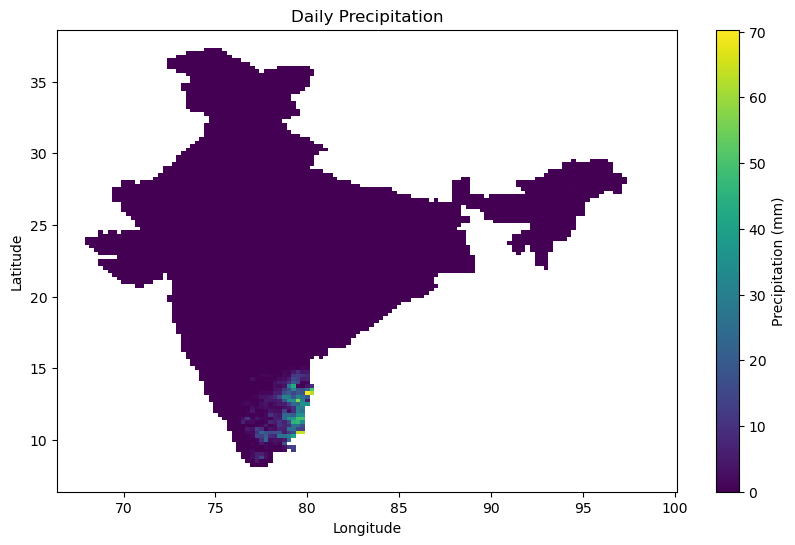

In [2]:
import netCDF4 as nc
import matplotlib.pyplot as plt

# Path to one of your daily netCDF files
netcdf_daily_file_path = "D:/GPM/IMD 2022/Daily/daily_precipitation_001.nc"

# Open the netCDF file
dataset = nc.Dataset(netcdf_daily_file_path, 'r')

# Read the variables
lon = dataset.variables['LONGITUDE'][:]
lat = dataset.variables['LATITUDE'][:]
precipitation = dataset.variables['RAINFALL'][:]

# Close the dataset
dataset.close()

# Plotting
plt.figure(figsize=(10, 6))
plt.pcolormesh(lon, lat, precipitation, shading='auto', cmap='viridis')
plt.colorbar(label='Precipitation (mm)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Daily Precipitation')
plt.show()
